In [1]:
import numpy as np
from scipy import signal
from scipy.fft import fft, ifft, fftfreq
import scipy.special as sc
import scipy.fftpack
import matplotlib.pyplot as plt
import matplotlib as mpl
# Use the pgf backend (must be set before pyplot imported)
# mpl.use('pgf')


def fm(beta):
    # Number of samplepoints
    N = 600
    # sample spacing
    T = 1.0 / 1000.0
    fc = 100.0
    fm = 30.0
    x = np.linspace(0.01, N*T, N)
    #beta = 1.0
    y_old = np.sin(fc * 2.0*np.pi*x+beta*np.sin(fm * 2.0*np.pi*x))
    y = 0*x;
    xf = fftfreq(N, 1 / N)
    for k in range (-4, 4):
        y = sc.jv(k,beta)*np.sin((fc+k*fm) * 2.0*np.pi*x)
        yf = fft(y)/(fc*np.pi)
        plt.plot(xf, np.abs(yf))
    plt.xlim(-150, 150)
    plt.show()
    #yf_old = fft(y_old)
    #plt.plot(xf, np.abs(yf_old))
    #plt.show()
    


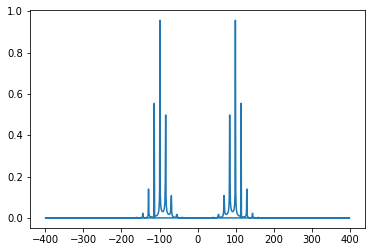

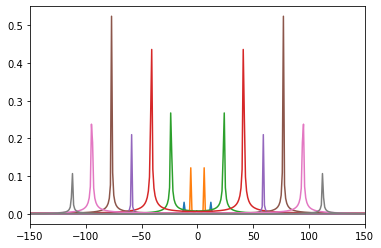

In [2]:
# Number of samplepoints
N = 800
# sample spacing
T = 1.0 / N
x = np.linspace(0.01, N*T, N)

y_old = np.sin(100* 2.0*np.pi*x+1*np.sin(15* 2.0*np.pi*x))
yf_old = fft(y_old)/(100*np.pi)
xf = fftfreq(N, 1 / N)
plt.plot(xf, np.abs(yf_old))
#plt.xlim(-150, 150)
plt.show()

fm(2)

0.7651976865579666


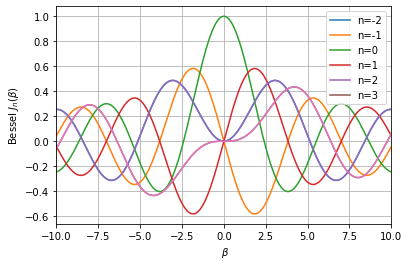

In [3]:

for n in range (-2,4):
    x = np.linspace(-11,11,1000)
    y = sc.jv(n,x)
    plt.plot(x, y, '-',label='n='+str(n))
#plt.plot([1,1],[sc.jv(0,1),sc.jv(-1,1)],)
plt.xlim(-10,10)
plt.grid(True)
plt.ylabel('Bessel $J_n(\\beta)$')
plt.xlabel(' $ \\beta $ ')
plt.plot(x, y)
plt.legend()
#plt.show()
plt.savefig('bessel.pgf', format='pgf')
print(sc.jv(0,1))

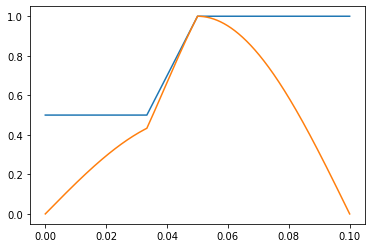

In [4]:
x = np.linspace(0,0.1,2000)
ratio = 2
first = 1
(length,)  = x.shape
slop = int(length/6)
second = ratio-first
odd = ratio % 2

first = int(first * length/ratio) 
second = int( second * length/ratio) + odd
slop = np.array(np.append(np.zeros(first-slop) , (np.arange(slop))/slop))
#steep = np.ones(int(first * length/ratio)+ odd) - np.exp(-np.arange(int(first * length/ratio) + odd)/200)
steep = (np.ones(first) + slop)*0.5

step = np.append(steep,  np.ones(second))
m = np.sin(5 * 2.0 * np.pi * x) * step 
plt.plot(x, step, '-')
plt.plot(x, m, '-')
plt.savefig('m_t.pgf', format='pgf')

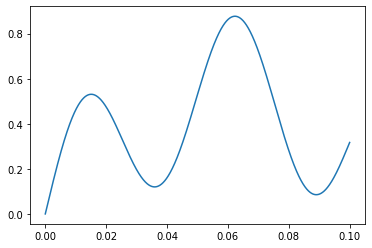

In [44]:

y = (np.sin(20 * 2.0*np.pi*x)+np.sin(5* 2.0*np.pi*x)+np.sin(2* 2.0*np.pi*x))/3
plt.plot(x, y, '-')
plt.show()